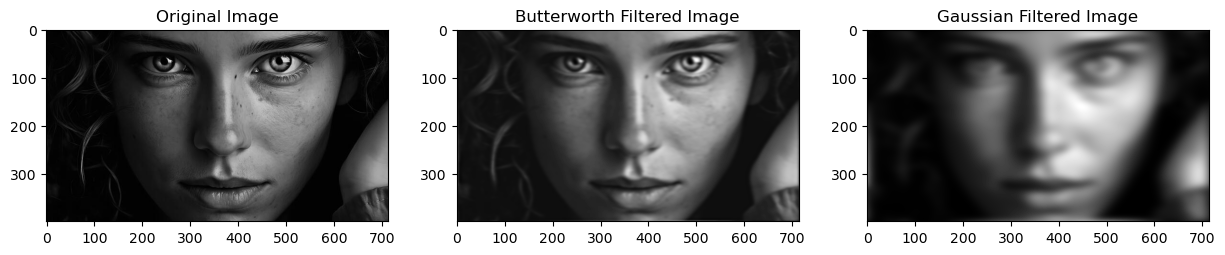

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def butterworth_lowpass_filter(img_shape, cutoff, order):
    rows, cols = img_shape
    u, v = np.meshgrid(np.arange(-cols//2, cols//2), np.arange(-rows//2, rows//2))
    D = np.sqrt(u**2 + v**2)
    H = 1 / (1 + (D / cutoff) ** (2 * order))
    return H

def gaussian_lowpass_filter(img_shape, sigma):
    rows, cols = img_shape
    u, v = np.meshgrid(np.arange(-cols//2, cols//2), np.arange(-rows//2, rows//2))
    D = np.sqrt(u**2 + v**2)
    H = np.exp(-(D ** 2) / (2 * (sigma ** 2)))
    return H

# Load the image and convert to grayscale
img = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)
dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)

# Apply Butterworth filter
butterworth_filter = butterworth_lowpass_filter(img.shape, cutoff=50, order=2)
filtered_dft_butterworth = dft_shift * butterworth_filter
filtered_img_butterworth = np.fft.ifft2(np.fft.ifftshift(filtered_dft_butterworth)).real

# Apply Gaussian filter
gaussian_filter = gaussian_lowpass_filter(img.shape, sigma=10)
filtered_dft_gaussian = dft_shift * gaussian_filter
filtered_img_gaussian = np.fft.ifft2(np.fft.ifftshift(filtered_dft_gaussian)).real

# Plot the original and filtered images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(filtered_img_butterworth, cmap='gray')
plt.title('Butterworth Filtered Image')

plt.subplot(1, 3, 3)
plt.imshow(filtered_img_gaussian, cmap='gray')
plt.title('Gaussian Filtered Image')

plt.show()
